In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

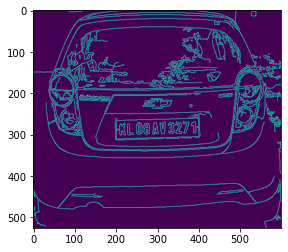

In [2]:
#convert the image to grayscale, blur it, and find edges
# Show in the image
img = cv2.imread('car2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(gray, 30, 200)
plt.imshow(edged)

In [3]:
# find contours in the edged image
# ones, and initialize our screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]

In [4]:
# loop over our contours
# approximate the contour
location = None
for cnts in cnts:
    approx = cv2.approxPolyDP(cnts, 10, True)
   # if our approximated contour has four points, then
   # we can assume that we have found our screen
    if len(approx) == 4:
        location = approx
        break

In [5]:
location

array([[[399, 262]],

       [[399, 305]],

       [[201, 309]],

       [[203, 266]]], dtype=int32)

In [6]:
#draw counters he parameter image is the target image for drawing the contour, the second parameter is the contour itself, the third parameter is which contour is drawn as -1 to draw all contours,
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,(255), -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

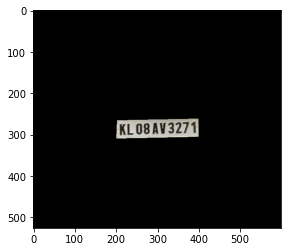

In [7]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [8]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

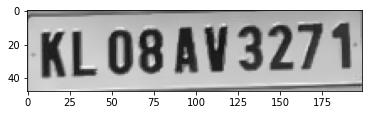

In [9]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [10]:
# read Number plate using easyocr from above cropped image
#store it in result
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\DELL\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[0, 0], [199, 0], [199, 48], [0, 48]], 'KL 08 AV3271', 0.7063175171873637)]

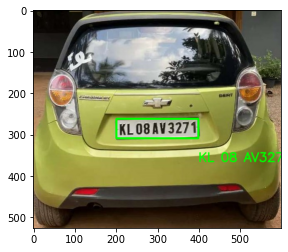

In [11]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [12]:
text

'KL 08 AV3271'